<a href="https://colab.research.google.com/github/typjohnson/MLA_TPJ/blob/main/MLA5_TPJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Problem 1

In [11]:
landsat_train = pd.read_csv('/content/drive/MyDrive/CS430/MLA5/landsat_train.csv')
landsat_test = pd.read_csv('/content/drive/MyDrive/CS430/MLA5/landsat_test.csv')

In [12]:
landsat_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [13]:
landsat_test.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


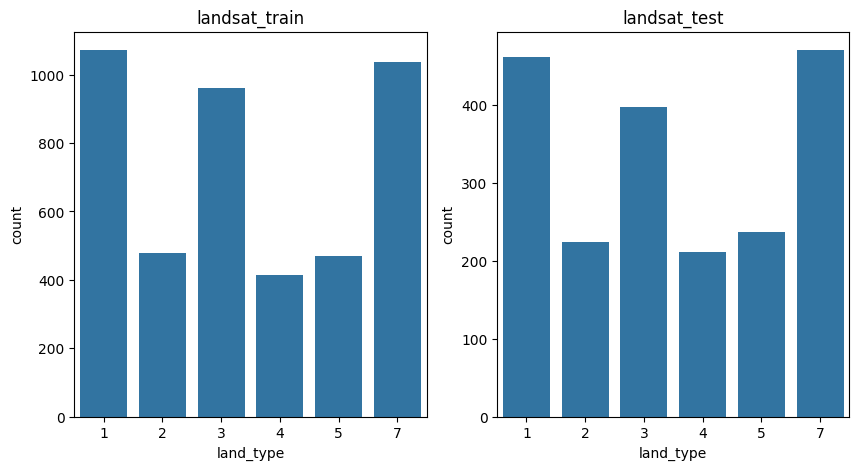

In [14]:
#create barplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x='land_type', data=landsat_train, ax=axs[0])
axs[0].set_title('landsat_train')
sns.countplot(x='land_type', data=landsat_test, ax=axs[1])
axs[1].set_title('landsat_test')
plt.show()

In [15]:
#splitting the data
X_train = landsat_train.drop('land_type', axis=1)
X_test = landsat_test.drop('land_type', axis=1)
y_train = landsat_train['land_type']
y_test = landsat_test['land_type']

In [20]:
numeric_features_train = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_features_test = X_test.select_dtypes(include=['int64', 'float64']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_train)
    ])
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier())])

In [21]:
#fitting the pipeline on the train data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [22]:
y_pred = pipeline.predict(X_test)

In [23]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98       461
           2       0.97      0.98      0.98       224
           3       0.89      0.94      0.92       397
           4       0.80      0.64      0.71       211
           5       0.93      0.90      0.91       237
           7       0.87      0.91      0.89       470

    accuracy                           0.91      2000
   macro avg       0.91      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



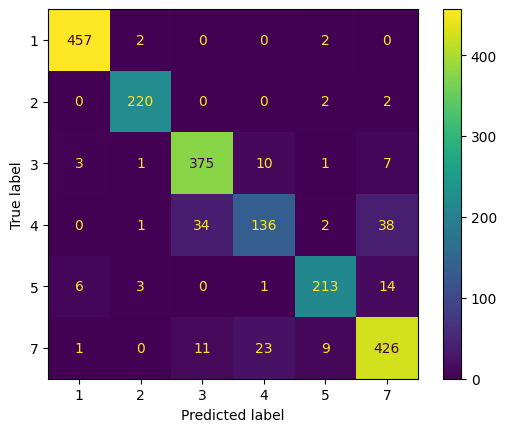

In [24]:
# confusion matrix
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Overall, the model performed fairly well with an overall accuracy of 91%. Classes 1 and 2 had the best performance with f1-score of 98%. Class 4 stands out as it had a lower f1-score of 71%, which was that low because of the 64% recall. There is room for imporvement when it comes to predicting that class. In general, this model proves to be adequate at predicting land type, although not perfect. Given the use case of predicting land type, a 91% accuracy along with the other performance measures should suffice. Random forest classifier works well with the model.

# Problem 2

In [27]:
# using a bagging classifier

bagging_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', BaggingClassifier())])
bagging_pipeline.fit(X_train, y_train)
y_pred_bagging = bagging_pipeline.predict(X_test)

In [28]:
#classification report
print(classification_report(y_test, y_pred_bagging))

              precision    recall  f1-score   support

           1       0.96      0.98      0.97       461
           2       0.96      0.96      0.96       224
           3       0.87      0.93      0.90       397
           4       0.67      0.59      0.63       211
           5       0.88      0.84      0.86       237
           7       0.87      0.87      0.87       470

    accuracy                           0.88      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.88      0.88      0.88      2000



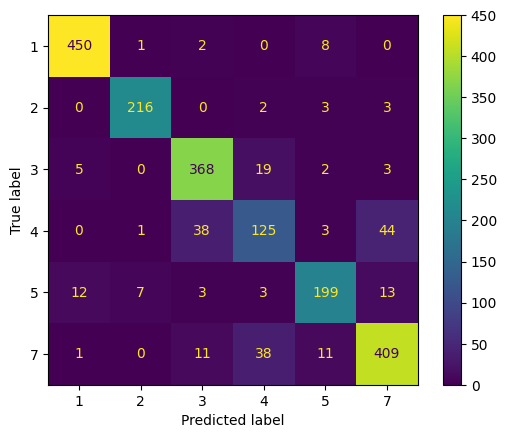

In [29]:
#confustion matrix
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_bagging)
plt.show()

The bagging classifer did not perform as well as the random forest classifier. It had an overall accuracy of 88%. One noticable change was the decrease in the f1-score for the class 4, which dropped to 63%. It was already low in the random forest, so an increased drop in the score brings up potential concerns. All metrics dropped by at least a percentage points, so the model would not be in consideration for use unless hyperparameter tuning would allow it to increase the performance.

# Problem 3

In [31]:
banknote = pd.read_csv('/content/drive/MyDrive/CS430/MLA5/banknote_authentication.csv')
banknote.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [33]:
#splitting the data
X = banknote.drop('forgery', axis=1)
y = banknote['forgery']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#random forest and minmax pipeline
pipeline = Pipeline(steps=[('scaler', MinMaxScaler()),
                           ('classifier', RandomForestClassifier())])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [35]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



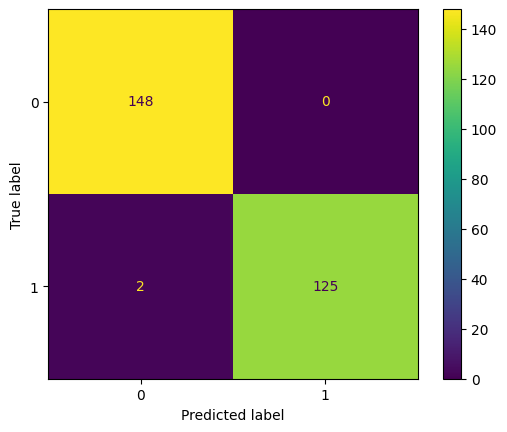

In [36]:
#confusion matrix
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

The random forest classifer performed very great when it comes to predicting banknote forgery. An overall accuracy score of 99% displays the strength of the model, and looking at the confusion matrix. There were two false positives and 0 false negatives. Given the use case of trying to find fraud, this is exceptional as it shows that no fraud went undiscovered, and ther were two instances which we predicted it was fraud but it ended up not being, a minor inconvinience that is easy to handle. In deployment, random forest would definitely be a candidate for use and with hyperparameter tuning, we could further strenghten the model and make it more robust.